In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('Online Retail.csv')
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 9)

In [45]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sales
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818,20.613638
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000,4.250000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000,11.700000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000
std,250.283037,NaN,69.764035,1714.006089,430.352218


In [6]:
df.dtypes

index            int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In the data we have null values in Description, CustomerID. We cannot have null values in customerID as it is important to our analysis. So we are droping the null values using the following querie.

In [9]:
df = df.dropna(axis = 0)
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
df.shape

(406829, 9)

Here after removing null values we can observe that total no of observations are 406829. In this data we dnt need index column as it is doesnt need any sequence so we will drop index column.

In [14]:
df.drop('index', axis= 1, inplace = True)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
df[df.duplicated(keep = False)].sort_values(['InvoiceNo', 'StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,11/4/2011 13:25,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,11/13/2011 11:38,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,12/6/2011 10:38,2.95,14562.0,United Kingdom


In the above quiery we are checking whether we have any duplicated values are not. Here in this data we have 10062 duplicate data so we are droping all the duplicate data by keeping the first data.

In [24]:
df = df.drop_duplicates(keep = 'first')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [37]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [25]:
df.shape

(401604, 8)

Here we are adding another column to know whether the order is cancelled or not if the order is not cancelled then it is denoted as -1, if the order is cancelled then it is denoted as 0.

In [50]:
df['Cancelled'] = df['InvoiceNo'].str.find('C', start = 0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30,-1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,-1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00,-1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,-1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34,-1


In the dataset we can observe that InvoiceDate is object and CustomerID is float64. Here we need to change the InvoiceDate in order to extract the data based on year and month. And we should change customerID into int to remove the decimal points in customerID.

In [41]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y')
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%m')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [42]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [44]:
df['Total_Sales'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,20.34


Here we are removing the outliers using IQR method based on quantity and unitprice.

In [100]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
#define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter out the outliers
df = df[(df['Quantity']>=lower_bound)&(df['Quantity']<=upper_bound)]
df.shape

(374958, 12)

In [101]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
#define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#filter out the outliers
df = df[(df['UnitPrice']>=lower_bound)&(df['UnitPrice']<=upper_bound)]
df.shape

(339453, 12)

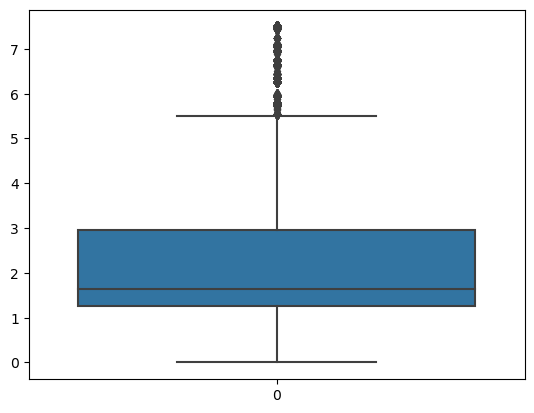

In [105]:
sns.boxplot(df.UnitPrice)
plt.show()

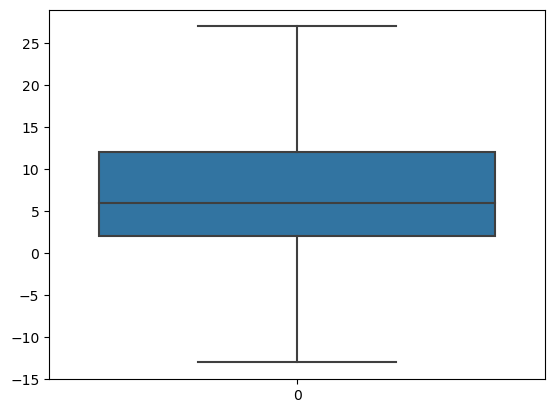

In [106]:
sns.boxplot(df.Quantity)
plt.show()

As we can see in the below chart the data is right skewed

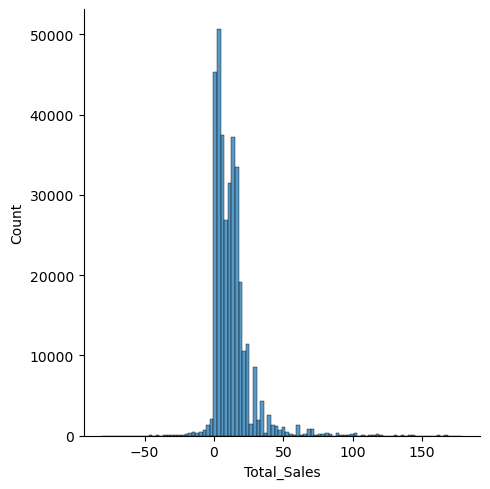

In [119]:
sns.displot(df['Total_Sales'],bins = 100)
plt.show()

Now we have completed cleaning the data. Lets proceed with the analysis part

In [62]:
total_sales_per_year = df.groupby('Year')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending=False)
total_sales_per_year

,Year,Total_Sales
1,2011,7726146.564
0,2010,552372.860


Text(0.5, 1.0, 'Sales per Year ')

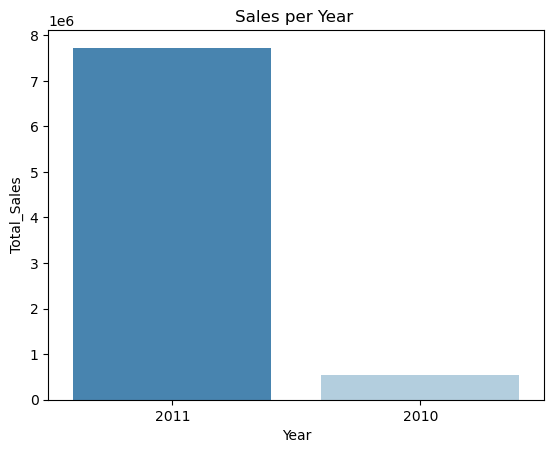

In [63]:
sns.barplot(data=total_sales_per_year, x='Year',y='Total_Sales')
plt.title("Sales per Year ")

We can observe from the above chart that total sales in 2011 are 7726146, and in 2010 are 552372. we have more sales in the year 2011.

In [71]:
total_sales_per_month = df.groupby(['Month','Year'])['Total_Sales'].sum().reset_index()
total_sales_per_month

,Month,Year,Total_Sales
0,01,2011,473731.900
1,02,2011,435534.070
2,03,2011,578576.210
3,04,2011,425222.671
4,05,2011,647011.670
5,06,2011,606862.520
6,07,2011,573112.321
7,08,2011,615078.090
8,09,2011,929356.232
9,10,2011,973306.380


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

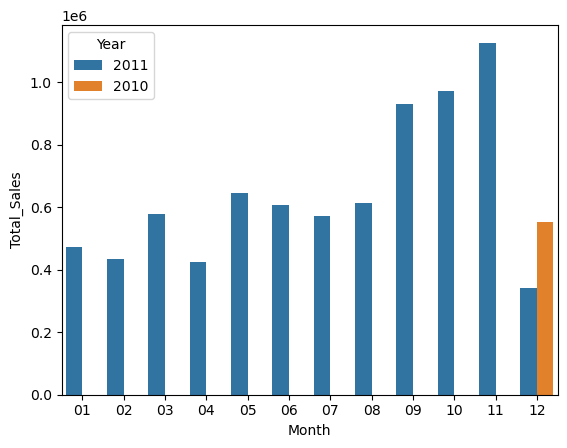

In [72]:
sns.barplot(data = total_sales_per_month, x = 'Month', y = 'Total_Sales', hue = 'Year')
plt.title(total_sales_per_month)

We can observe from the above chart that we have highest sales in 2011 November. And the sales were made in the month of December in 2010.

In [74]:
total_sales_per_country = df.groupby('Country')['Total_Sales'].sum().reset_index().sort_values('Total_Sales',ascending = False)
total_sales_per_country

,Country,Total_Sales
35,United Kingdom,6747156.154
23,Netherlands,284661.540
10,EIRE,250001.780
14,Germany,221509.470
13,France,196626.050
0,Australia,137009.770
32,Switzerland,55739.400
30,Spain,54756.030
3,Belgium,40910.960
31,Sweden,36585.410


Text(0.5, 1.0, 'top 5 countries with total sales')

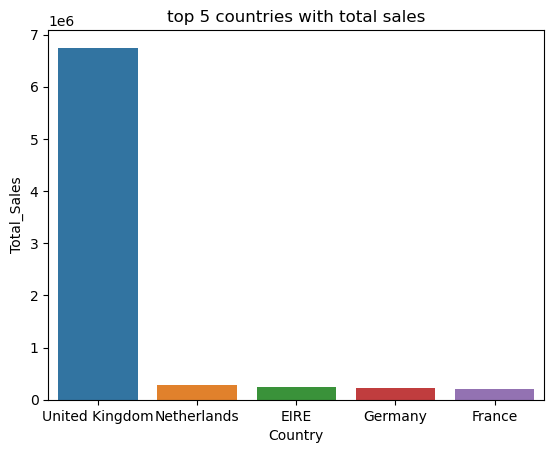

In [78]:
sns.barplot(data = total_sales_per_country.head(5), x = 'Country', y = 'Total_Sales')
plt.title('top 5 countries with total sales')

From the above chart we can observe that United Kingdom have 6747156 sales. And from below chart we can observe that Saudi Arabia have 131 sales. 

Text(0.5, 1.0, 'top 5 countries with total sales')

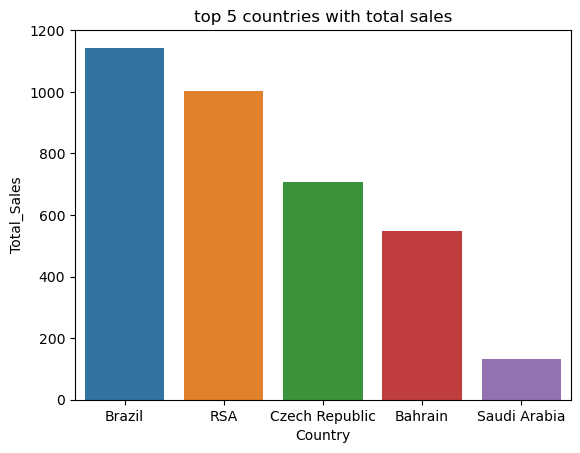

In [79]:
sns.barplot(data = total_sales_per_country.tail(5), x = 'Country', y = 'Total_Sales')
plt.title('top 5 countries with total sales')

In [112]:
total_sales_per_customers=df.groupby('Country')['CustomerID'].count().reset_index().sort_values('CustomerID', ascending=False)
total_sales_per_customers

,Country,CustomerID
35,United Kingdom,305556
14,Germany,7796
13,France,6977
10,EIRE,5600
30,Spain,2060
3,Belgium,1691
32,Switzerland,1459
26,Portugal,1263
24,Norway,784
18,Italy,635


Text(0.5, 1.0, 'total_sales_per_country')

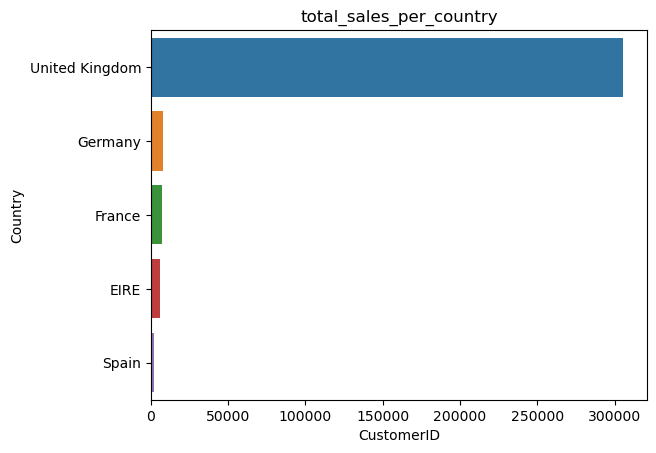

In [116]:
sns.barplot(data = total_sales_per_customers.head(5), x = 'CustomerID', y = 'Country')
plt.title('total_sales_per_country')

From the above graph we can observe that United Kingdom have maximum no of customer that is 356728. And from the below chart we ccan observe that saudi arabia have less number of customers that is 10.

Text(0.5, 1.0, 'total_sales_per_country')

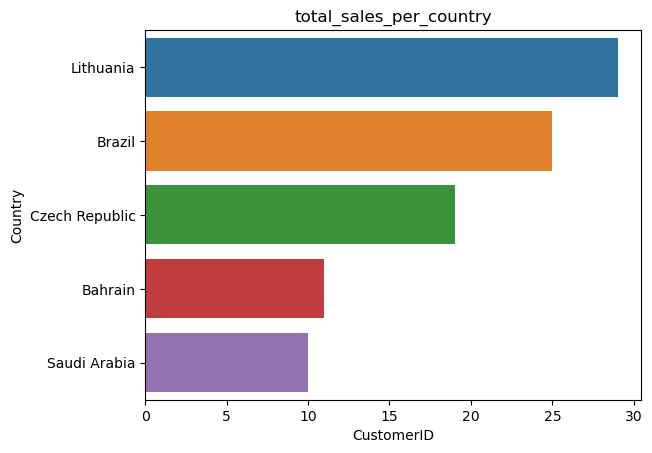

In [118]:
sns.barplot(data = total_sales_per_customers.tail(5), x = 'CustomerID', y = 'Country')
plt.title('total_sales_per_country')